<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [1]:
import numpy as np

m = np.array([
      [4, 2],
      [2, 4]
    ])

value, vector = np.linalg.eig(m)
value, vector

(array([6., 2.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('penguins')
print(df['species'].unique())
df.head()

['Adelie' 'Chinstrap' 'Gentoo']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.isna().sum()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리

features = df.loc[:, 'bill_length_mm':'body_mass_g'].values
species = df['species'].values

features = StandardScaler().fit_transform(features) # 데이터를 표준화한 값으로 대체

columns = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']
pd.DataFrame(features, columns=columns).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇 개로 할지 결정
printcipalComponents = pca.fit_transform(features) # 주성분 값 가져오기

# 주성분으로 이루어진 데이터프레임 구성
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2'])

# 주성분 데이터프레임과 기존의 'species' 열을 합치기
finalDf = finalDf = pd.concat([principalDf, df[['species']]], axis = 1)

finalDf.head()

,PC1,PC2,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,Adelie
4,-1.919981,0.817598,Adelie


In [7]:
# 주성분별로 기존 데이터의 분산을 반영하는 정도
ratio = pca.explained_variance_ratio_
ratio

array([0.68633893, 0.19452929])

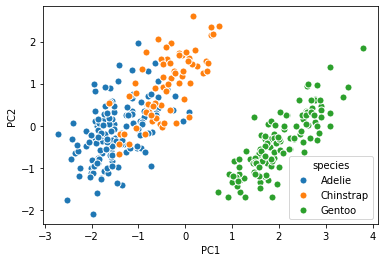

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

targets = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['#1F77B4', '#FF7F0E', '#2CA02C']
for target, color in zip(targets, colors): # 각 'species'별로 plot 위에 표시
    sps = finalDf['species'] == target
    ax.scatter(finalDf.loc[sps, 'PC1']
               , finalDf.loc[sps, 'PC2']
               , c = color
               , s = 50
               , marker = 'o'
               , edgecolor = 'w')
ax.legend(targets, title = "species", loc='lower right')

plt.show();

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


0.8808682242049918


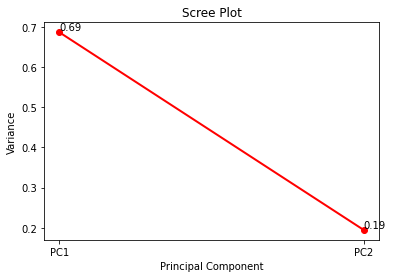

In [18]:
def scree(features, n_comps=2):
  pca = PCA(n_components=n_comps) # 주성분 개수 설정
  printcipalComponents = pca.fit_transform(features) # 주성분 값 구하기
  # 주성분으로 이루어진 데이터프레임 생성
  principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC'+str(num+1) for num in np.arange(n_comps)])
  
  pc_num = np.arange(pca.n_components_) # 주성분 개수만큼의 숫자 리스트(0부터) -> 플롯에 표시하기 위한 용도
  evr = pca.explained_variance_ratio_ # 각 주성분의 분산 반영률
  print(sum(evr))

  plt.xticks(pc_num, labels = ['PC'+str(num+1) for num in pc_num])
  plt.plot(pc_num, evr, 'ro-', linewidth=2)
  plt.title('Scree Plot')
  plt.xlabel('Principal Component')
  plt.ylabel('Variance')

  for i, v in enumerate(pc_num):
    # 좌표 (x축 = v, y축 = evr[0]..evr[n], 표시(반올림) = evr[0]..evr[n])
    plt.text(v, evr[i], round(evr[i], 2),
              fontsize = 10, 
              color='black',
              horizontalalignment='left',  # horizontalalignment (left, center, right)
              verticalalignment='bottom')    # verticalalignment (top, center, bottom)

  plt.show()

scree(features, 2)

0.9730288540858751


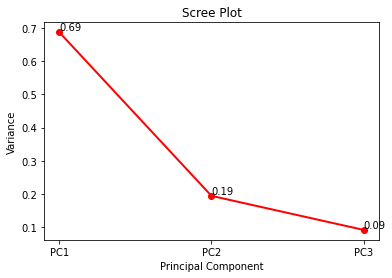

In [20]:
scree(features, 3) # 주성분 2개일 때 분산 반영률이 90% 미만이었므로 주성분 개수 조정(2 -> 3)

# 주성분 2개는 약 88%, 3개는 97%를 설명 가능하다.
# 따라서 90% 이상의 분산을 반영하려면 주성분 3개를 사용해야 한다.